In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/Circle.zip" -d "/content/"

Archive:  /content/drive/MyDrive/Circle.zip
   creating: /content/Circles/Train/
   creating: /content/Circles/Train/Healthy/
  inflating: /content/Circles/Train/Healthy/circA-P1.jpg  
  inflating: /content/Circles/Train/Healthy/circA-P10.jpg  
  inflating: /content/Circles/Train/Healthy/circA-P11.jpg  
  inflating: /content/Circles/Train/Healthy/circA-P12.jpg  
  inflating: /content/Circles/Train/Healthy/circA-P13.jpg  
  inflating: /content/Circles/Train/Healthy/circA-P14.jpg  
  inflating: /content/Circles/Train/Healthy/circA-P16.jpg  
  inflating: /content/Circles/Train/Healthy/circA-P17.jpg  
  inflating: /content/Circles/Train/Healthy/circA-P18.jpg  
  inflating: /content/Circles/Train/Healthy/circA-P19.jpg  
  inflating: /content/Circles/Train/Healthy/circA-P2.jpg  
  inflating: /content/Circles/Train/Healthy/circA-P20.jpg  
  inflating: /content/Circles/Train/Healthy/circA-P21.jpg  
  inflating: /content/Circles/Train/Healthy/circA-P22.jpg  
  inflating: /content/Circles/Train/

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

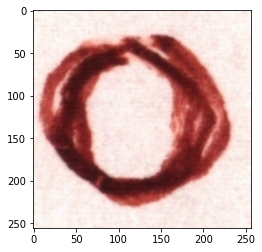

In [4]:
data_path = '/content/Circles/Train'
categories = ['Healthy', 'Unhealthy']
for category in categories:
  path = os.path.join(data_path, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    new_array = cv2.resize(img_array, (256, 256))
    plt.imshow(new_array, cmap='gray')
    # plt.show()
    break
  break

In [5]:
IMG_SIZE = 224

training_set = []

for category in categories:
  path = os.path.join(data_path, category)
  index = categories.index(category)
  for img in os.listdir(path):
    try:
      img_array = cv2.imread(os.path.join(path, img))
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      training_set.append([new_array, index])
    except Exception as e:
        pass


In [6]:
import random
random.shuffle(training_set)

In [7]:
X_train = []
y_train = []

for img_array, label in training_set:
  X_train.append(img_array)
  y_train.append(label)

In [8]:
X_train =  np.array(X_train).reshape(-1,IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train)

In [9]:
X_train = X_train/255.0

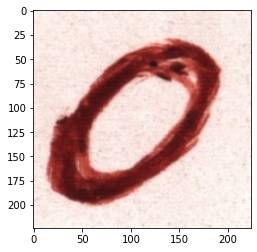

In [10]:
plt.imshow(X_train[0], cmap='gray')

In [11]:
X_train.shape

(56, 224, 224, 3)

In [12]:
y_train[:5]

array([0, 1, 1, 1, 1])

In [13]:
# import pickle
# X = pickle.load(open('/content/drive/MyDrive/Potato_X.pickle', 'rb'))
# y = pickle.load(open('/content/drive/MyDrive/Potato_y.pickle', 'rb'))

In [14]:
# X.shape

In [15]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
import numpy as np
import pandas as pd

In [16]:
vgg = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [17]:
# y = y.reshape(4682, 1)

In [18]:
# y.shape

In [19]:
for layer in vgg.layers:
  layer.trainable = False

In [20]:
model = Sequential()
for layer in vgg.layers:
  model.add(layer)

In [21]:
model.add(Flatten())

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [23]:
X_train.shape

(56, 224, 224, 3)

In [24]:
pred = model.predict([X_train])

In [25]:
pred.shape

(56, 25088)

In [26]:
y_train = y_train.reshape(1,56)

In [27]:
y_train = y_train.T

In [28]:
y_train.shape

(56, 1)

In [29]:
pred = np.append(pred, y_train, axis=1)

In [30]:
pred.shape

(56, 25089)

In [31]:
df = pd.DataFrame(np.array(pred))

In [81]:
df

,0,1,2,3,4,5,6,7,8,9,...,25079,25080,25081,25082,25083,25084,25085,25086,25087,25088
0,0.171776,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.048172,0.490439,0.0,0.0,0.505210,0.000000,0.0,0.684281,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.117348,0.453147,0.0,0.0,0.389249,0.000000,0.0,0.576277,0.0,1.0
2,0.106076,0.0,0.0,0.0,0.000000,0.0,0.0,0.135424,0.0,0.0,...,0.000000,0.302496,0.0,0.0,0.317190,0.000000,0.0,0.685181,0.0,1.0
3,0.091362,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.134055,0.576443,0.0,0.0,0.443589,0.000000,0.0,0.613095,0.0,1.0
4,0.117758,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.383858,0.0,0.0,0.447818,0.000000,0.0,0.772374,0.0,1.0
5,0.217170,0.0,0.0,0.0,0.000000,0.0,0.0,0.253395,0.0,0.0,...,0.000000,0.288736,0.0,0.0,0.182236,0.000000,0.0,0.662362,0.0,0.0
6,0.053541,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.115839,0.470534,0.0,0.0,0.357495,0.000000,0.0,0.569921,0.0,1.0
7,0.146918,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.086510,0.406224,0.0,0.0,0.470497,0.000000,0.0,0.602570,0.0,0.0
8,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.074695,0.0,0.0,0.089949,0.000000,0.0,0.759022,0.0,0.0
9,0.215243,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.002021,0.393591,0.0,0.0,0.409935,0.000000,0.0,0.583321,0.0,1.0


In [82]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [85]:
from xgboost import XGBClassifier
# fit model no training data
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier()

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4 2]
 [1 5]]


0.75

In [87]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5 1]
 [2 4]]


0.75

In [89]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4 2]
 [0 6]]


0.8333333333333334

In [91]:
from sklearn import svm
classifier = svm.SVC()
classifier.fit(X_train, y_train)

SVC()

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5 1]
 [2 4]]


0.75

In [93]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5 1]
 [3 3]]


0.6666666666666666

In [95]:
from lightgbm import LGBMClassifier
classifier = LGBMClassifier()
classifier.fit(X_train, y_train)


LGBMClassifier()

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4 2]
 [1 5]]


0.75

In [ ]:
# folders = glob('/content/Potato/*')

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
x = Dense(128, activation='relu', name='fcl')(x)

In [ ]:
x = Dropout(0.3)(x)

In [ ]:
prediction = Dense(3, activation='softmax', name='prediction')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
model.fit(X, y, batch_size=16, epochs=5, validation_split=0.2)


Epoch 1/5
  3/235 [..............................] - ETA: 33:08 - loss: 4.1651 - accuracy: 0.3542